In [ ]:
# import os
# os.chdir('/content/drive/My Drive/NN98')
# os.mkdir('./HW7+')

In [1]:
import os

os.chdir('/content/drive/My Drive/NN98/HW7+')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!sudo apt-get install -y xvfb ffmpeg
!pip install -q 'gym==0.10.11'
!pip install -q 'imageio==2.4.0'
!pip install -q PILLOW
!pip install -q 'pyglet==1.3.2'
!pip install -q pyvirtualdisplay
!pip install -q tf-agents


Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 784 kB in 2s (377 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a con

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.categorical_dqn import categorical_dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import categorical_q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

tf.compat.v1.enable_v2_behavior()


# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()



In [3]:
# import tempfile
# tempdir = os.getenv("TEST_TMPDIR", tempfile.gettempdir())

In [3]:
env_name = "MountainCar-v0" 
num_iterations = 15000 

initial_collect_steps = 1000  
collect_steps_per_iteration = 1  
replay_buffer_capacity = 100000  

fc_layer_params = (100,)

batch_size = 64  
learning_rate = 1e-3  
gamma = 0.99
log_interval = 200  

num_atoms = 51  
min_q_value = -20  
max_q_value = 20  
n_step_update = 2  

num_eval_episodes = 10  
eval_interval = 1000  


In [4]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)


In [10]:
# random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
#                                                 train_env.action_spec())


#Random 

In [ ]:

try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, random_policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  for _ in range(collect_steps_per_iteration):
    collect_step(train_env, random_policy)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience)

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss.loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, random_policy, num_eval_episodes)
    print('step = {0}: Average Return = {1:.2f}'.format(step, avg_return))
    returns.append(avg_return)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
step = 200: loss = 0.31074443459510803
step = 400: loss = 0.06790752708911896
step = 600: loss = 0.040737271308898926
step = 800: loss = 0.024884827435016632
step = 1000: loss = 0.016210008412599564
step = 1000: Average Return = -200.00
step = 1200: loss = 0.013085227459669113
step = 1400: loss = 0.007937300950288773
step = 1600: loss = 0.007840413600206375
step = 1800: loss = 0.007464038208127022
step = 2000: loss = 0.0056184520944952965
step = 2000: Average Return = -200.00
step = 2200: loss = 0.00486923661082983
step = 2400: loss = 0.003999913111329079
step = 2600: loss = 0.0035254359245300293
step = 2800: loss = 0.0029569659382104874
step = 3000: loss = 0.00257636746391654
step = 3000: Aver

In [ ]:
rewards = [-1*i for i in returns]


In [ ]:
first_win = None
for i, value in enumerate(rewards):
  #print(value)
  if value < 200:
    print(value)
    first_win = i
    break


In [ ]:
import numpy as np

In [ ]:
print('mean all reward : {} | min value : {} | first win : {} '.format(np.mean(rewards), np.min(rewards), first_win))

all reward : 200.0 | min value : 200.0 | first win : None 


Text(0.5, 0, 'Step')

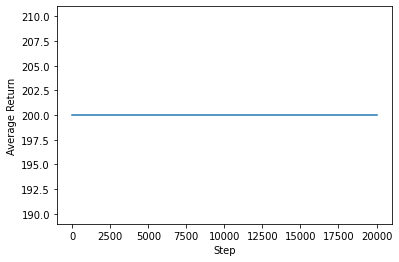

In [ ]:
steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, rewards)
plt.ylabel('Average Return')
plt.xlabel('Step')
#plt.ylim(top=550)


#DQN


In [5]:
num_iterations = 20000 

initial_collect_steps = 10000  
collect_steps_per_iteration = 1 
replay_buffer_max_length = 100000 

batch_size = 64  
learning_rate = 2e-5
log_interval = 200  

num_eval_episodes = 10
eval_interval = 1000


<tf.Variable 'global_step:0' shape=() dtype=int64, numpy=20000>

In [52]:
from tf_agents.networks import q_network
from tf_agents.agents.dqn import dqn_agent

fc_layer_params = (100, 500,)

q_net = q_network.QNetwork(
    train_env.observation_spec,
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)


optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

global_step = tf.compat.v1.train.get_or_create_global_step()

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=global_step)

agent.initialize()

TypeError: ignored

In [7]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

In [8]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())


In [9]:

def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# See also the metrics module for standard implementations of different metrics.
# https://github.com/tensorflow/agents/tree/master/tf_agents/metrics


In [10]:
compute_avg_return(eval_env, random_policy, num_eval_episodes)


-200.0

In [11]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_max_length)


In [12]:
def collect_step(environment, policy, buffer):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  buffer.add_batch(traj)

def collect_data(env, policy, buffer, steps):
  for _ in range(steps):
    collect_step(env, policy, buffer)

collect_data(train_env, random_policy, replay_buffer, steps=100)


In [13]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, 
    sample_batch_size=batch_size, 
    num_steps=2).prefetch(3)


dataset

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


<PrefetchDataset shapes: (Trajectory(step_type=(64, 2), observation=(64, 2, 2), action=(64, 2), policy_info=(), next_step_type=(64, 2), reward=(64, 2), discount=(64, 2)), BufferInfo(ids=(64, 2), probabilities=(64,))), types: (Trajectory(step_type=tf.int32, observation=tf.float32, action=tf.int64, policy_info=(), next_step_type=tf.int32, reward=tf.float32, discount=tf.float32), BufferInfo(ids=tf.int64, probabilities=tf.float32))>

In [14]:
iterator = iter(dataset)

print(iterator)


In [15]:
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  for _ in range(collect_steps_per_iteration):
    collect_step(train_env, agent.collect_policy, replay_buffer)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
step = 200: loss = 0.9606273770332336
step = 400: loss = 0.8767311573028564
step = 600: loss = 0.9154108166694641
step = 800: loss = 0.962945282459259
step = 1000: loss = 1.030388355255127
step = 1000: Average Return = -200.0
step = 1200: loss = 1.20720636844635
step = 1400: loss = 0.9478118419647217
step = 1600: loss = 1.131166696548462
step = 1800: loss = 1.1508253812789917
step = 2000: loss = 0.9901269674301147
step = 2000: Average Return = -200.0
step = 2200: loss = 1.8128387928009033
step = 2400: loss = 2.168142318725586
step = 2600: loss = 3.2109134197235107
step = 2800: loss = 2.682676315307617
step = 3000: loss = 2.7709760665893555
step = 3000: Average Return = -200.0
step = 3200: loss

#DQN - Categorical


In [11]:
categorical_q_net = categorical_q_network.CategoricalQNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    num_atoms=num_atoms,
    fc_layer_params=fc_layer_params)


In [12]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.compat.v2.Variable(0)

agent = categorical_dqn_agent.CategoricalDqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    categorical_q_network=categorical_q_net,
    optimizer=optimizer,
    min_q_value=min_q_value,
    max_q_value=max_q_value,
    n_step_update=n_step_update,
    td_errors_loss_fn=common.element_wise_squared_loss,
    gamma=gamma,
    train_step_counter=train_step_counter)
agent.initialize()


In [18]:

def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

compute_avg_return(eval_env, random_policy, num_eval_episodes)

# Please also see the metrics module for standard implementations of different
# metrics.


-200.0

In [12]:

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_capacity)

def collect_step(environment, policy):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  replay_buffer.add_batch(traj)

for _ in range(initial_collect_steps):
  collect_step(train_env, random_policy)

# This loop is so common in RL, that we provide standard implementations of
# these. For more details see the drivers module.

# Dataset generates trajectories with shape [BxTx...] where
# T = n_step_update + 1.
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, sample_batch_size=batch_size,
    num_steps=n_step_update + 1).prefetch(3)

iterator = iter(dataset)


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [13]:

try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  for _ in range(collect_steps_per_iteration):
    collect_step(train_env, agent.collect_policy)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience)

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss.loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1:.2f}'.format(step, avg_return))
    returns.append(avg_return)


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.44 µs


ValueError: ignored

In [18]:
def collect_step(environment, policy, buffer):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  buffer.add_batch(traj)

def collect_data(env, policy, buffer, steps):
  for _ in range(steps):
    collect_step(env, policy, buffer)

collect_data(train_env, random_policy, replay_buffer, steps=100)

# This loop is so common in RL, that we provide standard implementations. 
# For more details see the drivers module.
# https://www.tensorflow.org/agents/api_docs/python/tf_agents/drivers


In [19]:

collect_steps_per_iteration = 100
replay_buffer_capacity = 100000

fc_layer_params = (100,)

batch_size = 64
learning_rate = 1e-3
log_interval = 5

num_eval_episodes = 10
eval_interval = 1000


In [20]:
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  for _ in range(collect_steps_per_iteration):
    collect_step(train_env, agent.collect_policy, replay_buffer)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


ValueError: ignored

# Draw chart

In [16]:
rewards = [-1*i for i in returns]

In [33]:
first_win = 0
for i, value in enumerate(rewards):
  #print(value)
  if value < 200:
    print(value, "i :" , i)
    first_win = i
    break


In [17]:
import numpy as np

In [35]:
len(rewards)

21

In [18]:
print('mean all reward : {} | mean reward ta first win : {} | min value : {} | first win : {} '.format(np.mean(rewards), np.mean(rewards[:first_win+1]), np.min(rewards), first_win))

NameError: ignored

In [ ]:
print('mean all reward : {} | min value : {} | first win : {} '.format(np.mean(rewards), np.min(rewards), first_win))

mean all reward : 199.71904790969123 | min value : 194.10000610351562 | first win : 1 


In [ ]:
import numpy as np
np.mean(returns)

-199.71906

Text(0.5, 0, 'Step')

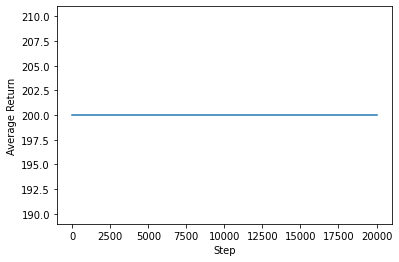

In [19]:
steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, rewards)
plt.ylabel('Average Return')
plt.xlabel('Step')
#plt.ylim(top=550)


In [42]:
import pickle
pickle.dump(returns, open('./rewards.dump', 'wb'))
pickle.dump(step, open('./steps.dump', 'wb'))


# Video

In [20]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)


In [21]:
num_episodes = 10
video_filename = 'q-network.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = agent.policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)


In [ ]:
# random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
#                                                 train_env.action_spec())


# Video Random Policy

In [ ]:
num_episodes = 10
video_filename = 'imageio_random_policy.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = random_policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)


#save

In [24]:
checkpoint_dir = './checkpoint-best-q-network'
train_checkpointer = common.Checkpointer(
    ckpt_dir=checkpoint_dir,
    max_to_keep=1,
    agent=agent,
    policy=agent.policy,
    replay_buffer=replay_buffer,
    global_step=global_step
)


In [25]:
train_checkpointer.save(global_step)


In [26]:
from tf_agents.policies import policy_saver

In [27]:
policy_dir = './policy-q-network'
tf_policy_saver = policy_saver.PolicySaver(agent.policy)
tf_policy_saver.save(policy_dir)


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: ./policy-q-network/assets


INFO:tensorflow:Assets written to: ./policy-q-network/assets


In [36]:

policy_dir = './policy'

In [35]:
train_checkpointer.initialize_or_restore()
global_step = tf.compat.v1.train.get_global_step()


In [37]:
saved_policy = tf.compat.v2.saved_model.load(policy_dir)
#run_episodes_and_create_video(saved_policy, eval_env, eval_py_env)


In [41]:
num_episodes = 10
video_filename = 'load-model.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = saved_policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())
      
embed_mp4(video_filename)